In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Downloading the Data

In [ ]:
#Please upload dataset manually, please use df = pd.read_csv('data.xlsx') if csv is not working
df = pd.read_csv('data.csv')

In [ ]:
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [ ]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


# Exploratory Data Analysis and Visualization

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

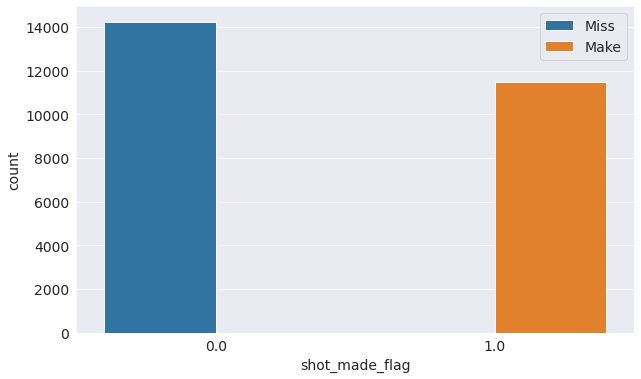

In [ ]:
sns.countplot(x="shot_made_flag", data=df, hue = 'shot_made_flag')
plt.legend(labels=['Miss','Make'])

In [ ]:
#you can move your mouse to the bar chart to check the actual values
fig = px.histogram(df,x='combined_shot_type',title='Distribution of Shot Type',color='combined_shot_type')
fig.show()

In [ ]:
#you can move your mouse to the bar chart to check the actual values
fig = px.histogram(df,x='shot_zone_range',title='Distribution of Shot Zone', color = 'shot_zone_range')
fig.show()

In [ ]:
#you can move your mouse to the bar chart to check the actual values
fig = px.histogram(df,x='shot_zone_basic',title='Distribution of shot_zone_basic', color = 'shot_zone_basic')
fig.show()

In [ ]:
#you can move your mouse to the bar chart to check the actual values
fig = px.histogram(df,x='shot_zone_area',title='Distribution of shot_zone_area', color = 'shot_zone_area')
fig.show()

In [ ]:
#you can move your mouse to the bar chart to check the actual values
fig = px.histogram(df, x="shot_distance", marginal = 'box', title= 'Distribution of Shot Distance')
fig.show()

# Training and Test Sets

In [ ]:
df = df.set_index('shot_id')

In [ ]:
df = df[pd.notnull(df['shot_made_flag'])]

In [ ]:
df['period'] = df.period.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['playoffs'] = df.playoffs.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['remaining_time'] = df['minutes_remaining'] * 60 + df['seconds_remaining']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
df_train

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,remaining_time
shot_id,,,,,,,,,,,,,,,,,,,,,
23443,Jump Shot,Jump Shot,373,29700177,33.8933,-1,151,-118.2708,9,4,...,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1997-11-25,LAL @ MIA,MIA,572
22160,Cutting Layup Shot,Layup,292,21500370,34.0423,6,2,-118.2638,9,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2015-12-15,LAL vs. MIL,MIL,569
16583,Fadeaway Jump Shot,Jump Shot,224,21000120,33.9893,108,55,-118.1618,6,2,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2010-11-11,LAL @ DEN,DEN,366
26321,Jump Shot,Jump Shot,62,40000051,33.8653,47,179,-118.2228,5,1,...,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2001-05-13,LAL @ SAC,SAC,322
15096,Driving Layup Shot,Layup,322,20900146,34.0443,0,0,-118.2698,7,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2009-11-15,LAL vs. HOU,HOU,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,Jump Shot,Jump Shot,466,29900821,34.0713,158,-27,-118.1118,1,4,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-03-01,LAL vs. VAN,VAN,84
6419,Jump Shot,Jump Shot,131,20400145,33.5163,-128,528,-118.3978,0,1,...,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,1610612747,Los Angeles Lakers,2004-11-21,LAL vs. CHI,CHI,0
1032,Jump Shot,Jump Shot,319,20000666,33.8733,132,171,-118.1378,3,3,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2001-02-02,LAL vs. CHH,CHA,194


In [ ]:
df_test

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,remaining_time
shot_id,,,,,,,,,,,,,,,,,,,,,
24547,Jump Shot,Jump Shot,316,29800265,34.0453,164,-1,-118.1058,8,3,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1999-03-10,LAL vs. LAC,LAC,491
26432,Jump Shot,Jump Shot,14,40000072,33.9343,-69,110,-118.3388,10,1,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2001-05-27,LAL vs. SAS,SAS,604
25052,Jump Shot,Jump Shot,146,29900245,33.9383,147,106,-118.1228,11,2,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1999-12-05,LAL vs. ORL,ORL,689
26210,Driving Layup Shot,Layup,304,40000005,34.0443,0,0,-118.2698,7,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2001-04-22,LAL vs. POR,POR,459
14337,Layup Shot,Layup,476,20800834,34.0443,0,0,-118.2698,1,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2009-02-22,LAL @ MIN,MIN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,Layup Shot,Layup,409,29700183,34.0413,12,3,-118.2578,9,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1997-11-26,LAL @ BOS,BOS,545
8449,Jump Shot,Jump Shot,410,20500512,33.9393,-174,105,-118.4438,0,4,...,2PT Field Goal,Left Side(L),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2006-01-12,LAL vs. CLE,CLE,8
23034,Jump Shot,Jump Shot,113,29600488,34.0423,166,2,-118.1038,1,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1997-01-10,LAL vs. MIA,MIA,70


In [ ]:
input_cols = list(df.columns)
target_col = 'shot_made_flag'

In [ ]:
train_inputs = df_train[input_cols].copy()
train_targets = df_train[target_col].copy()

In [ ]:
test_inputs = df_test[input_cols].copy()
test_targets = df_test[target_col].copy()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 23443 to 28260
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   action_type         23127 non-null  object  
 1   combined_shot_type  23127 non-null  object  
 2   game_event_id       23127 non-null  int64   
 3   game_id             23127 non-null  int64   
 4   lat                 23127 non-null  float64 
 5   loc_x               23127 non-null  int64   
 6   loc_y               23127 non-null  int64   
 7   lon                 23127 non-null  float64 
 8   minutes_remaining   23127 non-null  int64   
 9   period              23127 non-null  category
 10  playoffs            23127 non-null  category
 11  season              23127 non-null  object  
 12  seconds_remaining   23127 non-null  int64   
 13  shot_distance       23127 non-null  int64   
 14  shot_made_flag      23127 non-null  float64 
 15  shot_type           23127 non-nu

In [ ]:
train_inputs

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,remaining_time
shot_id,,,,,,,,,,,,,,,,,,,,,
23443,Jump Shot,Jump Shot,373,29700177,33.8933,-1,151,-118.2708,9,4,...,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1997-11-25,LAL @ MIA,MIA,572
22160,Cutting Layup Shot,Layup,292,21500370,34.0423,6,2,-118.2638,9,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2015-12-15,LAL vs. MIL,MIL,569
16583,Fadeaway Jump Shot,Jump Shot,224,21000120,33.9893,108,55,-118.1618,6,2,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2010-11-11,LAL @ DEN,DEN,366
26321,Jump Shot,Jump Shot,62,40000051,33.8653,47,179,-118.2228,5,1,...,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2001-05-13,LAL @ SAC,SAC,322
15096,Driving Layup Shot,Layup,322,20900146,34.0443,0,0,-118.2698,7,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2009-11-15,LAL vs. HOU,HOU,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,Jump Shot,Jump Shot,466,29900821,34.0713,158,-27,-118.1118,1,4,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-03-01,LAL vs. VAN,VAN,84
6419,Jump Shot,Jump Shot,131,20400145,33.5163,-128,528,-118.3978,0,1,...,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,1610612747,Los Angeles Lakers,2004-11-21,LAL vs. CHI,CHI,0
1032,Jump Shot,Jump Shot,319,20000666,33.8733,132,171,-118.1378,3,3,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2001-02-02,LAL vs. CHH,CHA,194


In [ ]:
train_inputs = df_train.drop(columns=['game_date','game_event_id','shot_made_flag','matchup','game_id','lat','lon','minutes_remaining','team_id','team_name','seconds_remaining'])

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23127 entries, 23443 to 28260
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   action_type         23127 non-null  object  
 1   combined_shot_type  23127 non-null  object  
 2   loc_x               23127 non-null  int64   
 3   loc_y               23127 non-null  int64   
 4   period              23127 non-null  category
 5   playoffs            23127 non-null  category
 6   season              23127 non-null  object  
 7   shot_distance       23127 non-null  int64   
 8   shot_type           23127 non-null  object  
 9   shot_zone_area      23127 non-null  object  
 10  shot_zone_basic     23127 non-null  object  
 11  shot_zone_range     23127 non-null  object  
 12  opponent            23127 non-null  object  
 13  remaining_time      23127 non-null  int64   
dtypes: category(2), int64(4), object(8)
memory usage: 2.3+ MB


In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['loc_x', 'loc_y', 'shot_distance', 'remaining_time']

# Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,remaining_time
shot_id,,,,,,,,,,,,,,
23443,Jump Shot,Jump Shot,0.500000,0.233533,4,0,1997-98,0.189873,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,MIA,0.801120
22160,Cutting Layup Shot,Layup,0.514056,0.055090,3,0,2015-16,0.000000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,MIL,0.796919
16583,Fadeaway Jump Shot,Jump Shot,0.718876,0.118563,2,0,2010-11,0.151899,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,DEN,0.512605
26321,Jump Shot,Jump Shot,0.596386,0.267066,1,1,2000-01,0.227848,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,SAC,0.450980
15096,Driving Layup Shot,Layup,0.502008,0.052695,3,0,2009-10,0.000000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,HOU,0.592437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,Jump Shot,Jump Shot,0.819277,0.020359,4,0,1999-00,0.202532,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,VAN,0.117647
6419,Jump Shot,Jump Shot,0.244980,0.685030,1,0,2004-05,0.683544,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,CHI,0.000000
1032,Jump Shot,Jump Shot,0.767068,0.257485,3,0,2000-01,0.265823,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,CHA,0.271709


## Encoding Categorical Data

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['action_type_Alley Oop Dunk Shot', 'action_type_Alley Oop Layup shot', 'action_type_Cutting Layup Shot', 'action_type_Driving Bank shot', 'action_type_Driving Dunk Shot', 'action_type_Driving Finger Roll Layup Shot', 'action_type_Driving Finger Roll Shot', 'action_type_Driving Floating Bank Jump Shot', 'action_type_Driving Floating Jump Shot', 'action_type_Driving Hook Shot', 'action_type_Driving Jump shot', 'action_type_Driving Layup Shot', 'action_type_Driving Reverse Layup Shot', 'action_type_Driving Slam Dunk Shot', 'action_type_Dunk Shot', 'action_type_Fadeaway Bank shot', 'action_type_Fadeaway Jump Shot', 'action_type_Finger Roll Layup Shot', 'action_type_Finger Roll Shot', 'action_type_Floating Jump shot', 'action_type_Follow Up Dunk Shot', 'action_type_Hook Bank Shot', 'action_type_Hook Shot', 'action_type_Jump Bank Shot', 'action_type_Jump Hook Shot', 'action_type_Jump Shot', 'action_type_Layup Shot', 'action_type_Pullup Bank shot', 'action_type_Pullup Jump shot', 'action_typ

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
test_inputs

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
shot_id,,,,,,,,,,,,,,,,,,,,,
24547,Jump Shot,Jump Shot,316,29800265,34.0453,0.831325,0.051497,-118.1058,8,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26432,Jump Shot,Jump Shot,14,40000072,33.9343,0.363454,0.184431,-118.3388,10,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25052,Jump Shot,Jump Shot,146,29900245,33.9383,0.797189,0.179641,-118.1228,11,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26210,Driving Layup Shot,Layup,304,40000005,34.0443,0.502008,0.052695,-118.2698,7,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14337,Layup Shot,Layup,476,20800834,34.0443,0.502008,0.052695,-118.2698,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,Layup Shot,Layup,409,29700183,34.0413,0.526104,0.056287,-118.2578,9,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8449,Jump Shot,Jump Shot,410,20500512,33.9393,0.152610,0.178443,-118.4438,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23034,Jump Shot,Jump Shot,113,29600488,34.0423,0.835341,0.055090,-118.1038,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

Making Predictions and Evaluating the Model

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
train_preds

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_targets

shot_id
23443    0.0
22160    1.0
16583    0.0
26321    1.0
15096    1.0
        ... 
25768    1.0
6419     0.0
1032     1.0
18816    0.0
28260    1.0
Name: shot_made_flag, Length: 23127, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_targets, test_preds)

0.6898832684824903

In [ ]:
accuracy_score(train_targets, train_preds)

0.6825788039953301

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.86113066, 0.13886934],
       [0.53830528, 0.46169472]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 68.26%


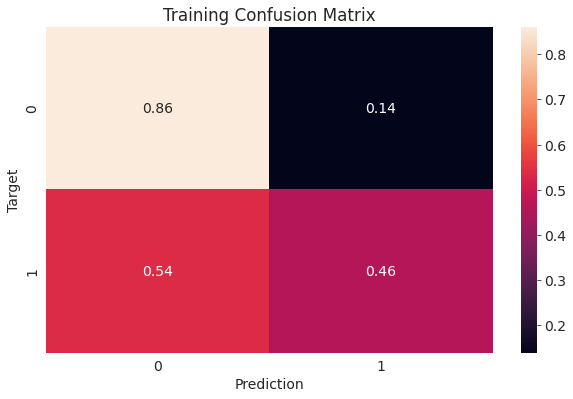

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 413 ms, sys: 0 ns, total: 413 ms
Wall time: 417 ms


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
pd.value_counts(train_preds)

0.0    12792
1.0    10335
dtype: int64

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
accuracy_score(train_targets, train_preds)

0.9998702814891685

In [ ]:
from sklearn.tree import plot_tree, export_text

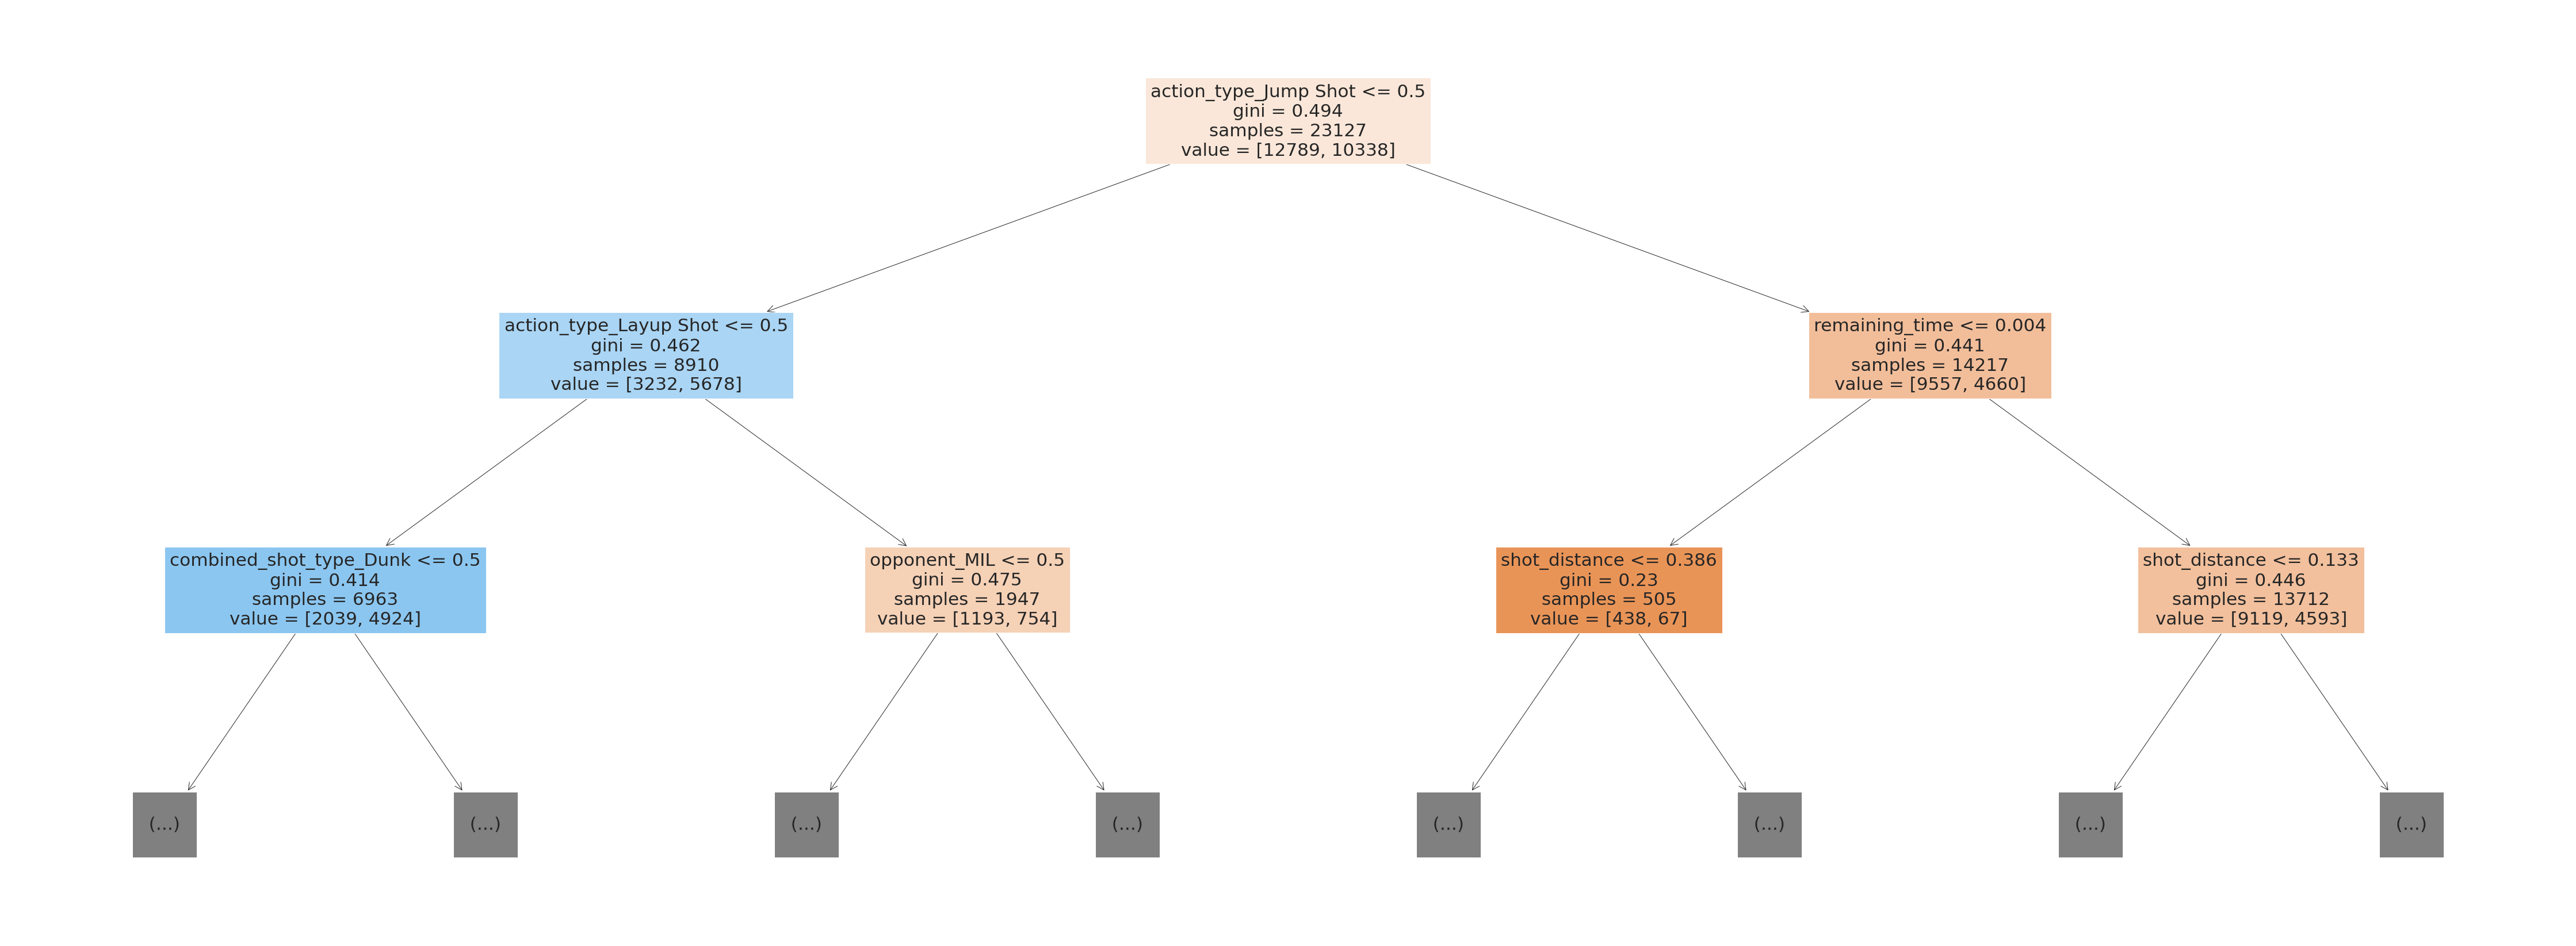

In [ ]:
plt.figure(figsize=(80,30))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)
plt.show()

In [ ]:
model.feature_importances_

array([1.13504401e-01, 1.09538998e-01, 3.86425712e-02, 2.04989169e-01,
       3.41091128e-04, 5.22295178e-04, 1.07513513e-04, 0.00000000e+00,
       2.04130050e-04, 8.74843071e-05, 5.85172810e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53654364e-04, 6.40427473e-04,
       5.09233948e-04, 0.00000000e+00, 1.08462844e-03, 3.23715689e-04,
       1.07241248e-03, 2.32041710e-04, 2.85549497e-04, 4.55006504e-04,
       1.82505998e-05, 0.00000000e+00, 1.25925911e-03, 1.28027254e-03,
       2.65103961e-05, 9.17921291e-02, 2.72448314e-02, 0.00000000e+00,
       8.80331096e-04, 4.99946464e-05, 2.55553646e-04, 7.71174404e-05,
       4.92845317e-05, 1.00513075e-03, 0.00000000e+00, 0.00000000e+00,
       6.85617755e-05, 1.39048527e-04, 1.09106286e-04, 1.28840525e-04,
       2.05312278e-03, 4.27934601e-04, 0.00000000e+00, 2.29027662e-04,
       0.00000000e+00, 0.00000000e+00, 2.04130050e-04, 5.53864401e-04,
       1.23798548e-04, 0.00000000e+00, 2.85037343e-04, 1.57553221e-03,
      

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
3,remaining_time,0.204989
0,loc_x,0.113504
1,loc_y,0.109539
29,action_type_Jump Shot,0.091792
2,shot_distance,0.038643
30,action_type_Layup Shot,0.027245
132,opponent_SAS,0.012862
115,opponent_HOU,0.010365
76,season_2007-08,0.010364
130,opponent_POR,0.009764


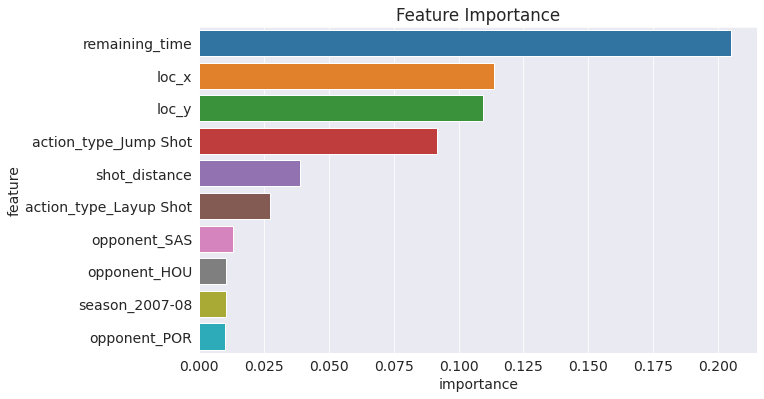

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.6784278116487222

In [ ]:
model.score(X_test, test_targets)

0.6856031128404669

In [ ]:
model.classes_

array([0., 1.])

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    test_acc = 1 - model.score(X_test, test_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'test Error': test_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 4.15 s, sys: 8.19 ms, total: 4.16 s
Wall time: 4.18 s


In [ ]:
errors_df

,Max Depth,Training Error,test Error
0,1,0.341246,0.333852
1,2,0.322264,0.312451
2,3,0.321572,0.314397
3,4,0.319583,0.312451
4,5,0.319021,0.312840
5,6,0.317594,0.311673
6,7,0.313919,0.321790
7,8,0.311065,0.321790
8,9,0.307519,0.319455
9,10,0.301509,0.315564


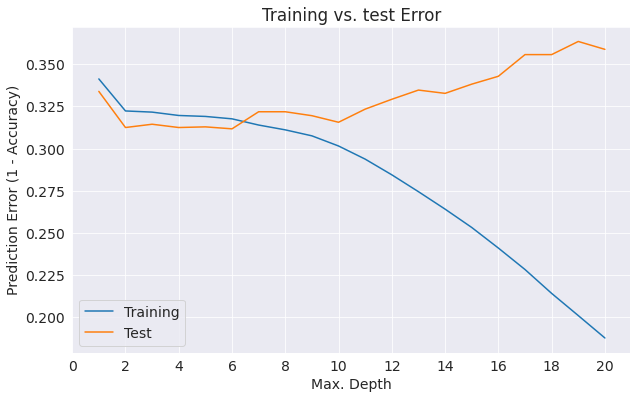

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['test Error'])
plt.title('Training vs. test Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_test, test_targets)

0.6782101167315175

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 426 ms, sys: 3.16 ms, total: 430 ms
Wall time: 427 ms


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
accuracy_score(train_targets, train_preds)

0.9998702814891685

In [ ]:
model.score(X_train, train_targets)

0.9998702814891685

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets)

0.9998702814891685

In [ ]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)


In [ ]:
base_train_acc = base_model.score(X_train, train_targets)
base_test_acc = base_model.score(X_test, test_targets)

In [ ]:
base_accs = base_train_acc, base_test_acc
base_accs

(0.9998702814891685, 0.6583657587548638)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)


In [ ]:
model.fit(X_train, train_targets)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, train_targets), model.score(X_test, test_targets)


(0.9763479915250572, 0.645136186770428)

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_test, test_targets)

In [ ]:
test_params(max_depth=5)

(0.6616508842478488, 0.6649805447470817)

In [ ]:
test_params(max_depth=26)


(0.850910191551001, 0.6859922178988327)

In [ ]:
test_params(max_leaf_nodes=2**5)


(0.6800276732823107, 0.6859922178988327)

In [ ]:
test_params(max_leaf_nodes=2**20)


(0.9998702814891685, 0.6556420233463035)

In [ ]:
base_accs # no max depth or max leaf nodes


(0.9998702814891685, 0.6583657587548638)

# KNN

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets

In [ ]:
df = df.dropna()

In [ ]:
df['remaining_time'] = df['minutes_remaining'] * 60 + df['seconds_remaining']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_dis = df[['shot_distance','shot_made_flag','remaining_time']]

In [ ]:
df_dis

,shot_distance,shot_made_flag,remaining_time
1,15,0.0,622
2,16,1.0,465
3,22,0.0,412
4,0,1.0,379
5,14,0.0,572
...,...,...,...
30691,0,0.0,424
30692,4,0.0,365
30694,21,1.0,208
30695,26,0.0,130


In [ ]:
attribute_values = df_dis[['shot_distance','remaining_time']].to_numpy()

In [ ]:
target_values = df_dis['shot_made_flag'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_attribute_values, test_attribute_values, train_target_values, test_target_values = train_test_split(attribute_values, target_values,test_size =0.20, random_state=1,stratify=target_values)

In [ ]:
train_attribute_values.shape

(20557, 2)

In [ ]:
test_attribute_values.shape

(5140, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
pipe_line = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=1000))

In [ ]:
pipe_line.fit(train_attribute_values,train_target_values)
test_predicted_values = pipe_line.predict(test_attribute_values)

In [ ]:
print('Test Accuracy: %.4f' % pipe_line.score(test_attribute_values, test_target_values))

Test Accuracy: 0.6031


In [ ]:
x=attribute_values
y=target_values
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(x,y)


In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_regions(x,y,classifier):
    cmap = ListedColormap(('red','blue'))
    xx1, xx2 = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(),(x[:,0].max()-x[:,0].min())/200), 
                           np.arange(x[:,1].min(), x[:,1].max(),(x[:,1].max()-x[:,1].min())/200))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.1, cmap = cmap)
    for idex, cl in enumerate(np.unique(y)):
        plt.scatter(x[y == cl, 0 ], x[y == cl,1],
                    alpha = 0.8, color=cmap(idex),
                    marker='+',label=cl)
         

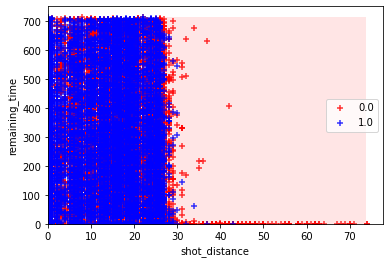

In [ ]:
plot_decision_regions(train_attribute_values,train_target_values,pipe_line)
plt.xlabel('shot_distance')
plt.ylabel('remaining_time')
plt.legend(loc='right')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier(random_state=30)

In [ ]:
modelRF.fit(X_train, train_targets)

RandomForestClassifier(random_state=30)

In [ ]:
train_preds = modelRF.predict(X_train)
train_preds

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
pd.value_counts(train_preds)

0.0    12788
1.0    10339
dtype: int64

In [ ]:
train_probs = modelRF.predict_proba(X_train)
train_probs

array([[0.85, 0.15],
       [0.08, 0.92],
       [0.84, 0.16],
       ...,
       [0.16, 0.84],
       [0.88, 0.12],
       [0.33, 0.67]])

In [ ]:
from sklearn import metrics
print("Accuracy Score ==", metrics.accuracy_score(train_targets, train_preds))

Accuracy Score == 0.9998702814891685


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
con_matrix = confusion_matrix(train_targets, train_preds)
con_matrix

array([[12787,     2],
       [    1, 10337]])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

Text(69.0, 0.5, 'Acutal')

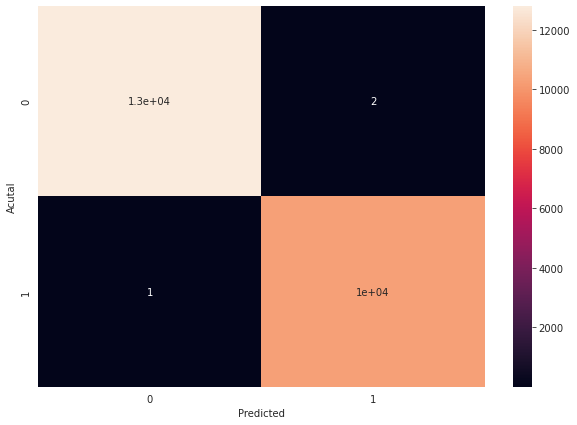

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Acutal')

In [ ]:
modelRF.feature_importances_

array([1.13387958e-01, 1.13681130e-01, 6.44067290e-02, 1.79762718e-01,
       4.95425845e-04, 5.82246393e-04, 5.90538150e-05, 3.18521566e-05,
       1.96556173e-03, 7.02333999e-04, 7.16906585e-04, 1.91141502e-05,
       5.27233215e-05, 9.72090055e-05, 2.87664324e-04, 7.37434018e-03,
       5.95461174e-04, 1.41148010e-04, 9.13960623e-04, 3.93966519e-04,
       3.38601870e-03, 2.81286411e-04, 4.19238192e-04, 8.31540420e-04,
       7.11956108e-05, 2.12063965e-05, 7.29352637e-04, 3.62910529e-03,
       1.83906148e-04, 4.01382687e-02, 1.43364622e-02, 8.79772858e-05,
       4.06712640e-03, 8.26199478e-05, 1.23405898e-04, 6.92734233e-05,
       3.09215785e-04, 1.32226415e-03, 5.18848809e-05, 2.96914089e-04,
       8.66199759e-05, 8.09426507e-05, 8.68504356e-05, 4.35896299e-04,
       8.36729566e-03, 4.27515220e-04, 4.01525934e-05, 1.32268844e-04,
       1.84155834e-07, 2.52047051e-05, 2.62085387e-03, 1.00859131e-03,
       3.36171487e-05, 1.24120173e-03, 3.87313870e-04, 2.01261569e-03,
      

In [ ]:
feature_list = list(X_train.columns)

In [ ]:
feature_import = pd.DataFrame({'Feature': feature_list, 'Importance': modelRF.feature_importances_}).sort_values('Importance', ascending=False)

In [ ]:
print(feature_import)

                                        Feature    Importance
3                                remaining_time  1.797627e-01
1                                         loc_y  1.136811e-01
0                                         loc_x  1.133880e-01
2                                 shot_distance  6.440673e-02
29                        action_type_Jump Shot  4.013827e-02
..                                          ...           ...
49                 action_type_Running Tip Shot  2.520471e-05
25                   action_type_Hook Bank Shot  2.120640e-05
11  action_type_Driving Floating Bank Jump Shot  1.911415e-05
56      action_type_Turnaround Finger Roll Shot  1.391218e-05
48           action_type_Running Slam Dunk Shot  1.841558e-07

[138 rows x 2 columns]


In [ ]:
feature_import.head(12)

,Feature,Importance
3,remaining_time,0.179763
1,loc_y,0.113681
0,loc_x,0.113388
2,shot_distance,0.064407
29,action_type_Jump Shot,0.040138
30,action_type_Layup Shot,0.014336
60,combined_shot_type_Dunk,0.013279
115,opponent_HOU,0.009656
74,season_2005-06,0.009598
77,season_2008-09,0.009544


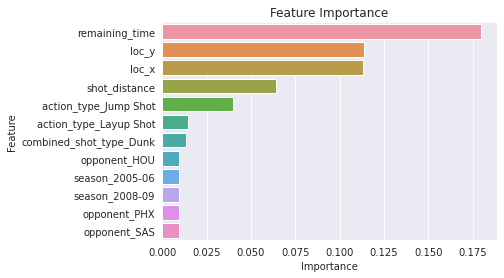

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=feature_import.head(12), x='Importance', y='Feature');

Fine Tune with GridSearchCV

In [ ]:
n_estim = [int(x) for x in np.linspace(start = 10, stop = 75, num = 10)]
max_feat = ['auto', 'sqrt']
max_dep = [2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
parameter_grid = {'n_estimators': n_estim, 'max_features': max_feat, 'max_depth': max_dep,
                  'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}


In [ ]:
print(parameter_grid)

{'n_estimators': [10, 17, 24, 31, 38, 46, 53, 60, 67, 75], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
modelRF_Grid = GridSearchCV(estimator = modelRF, param_grid = parameter_grid, cv = 3, verbose = 2, n_jobs = 4)

In [ ]:
modelRF_Grid.fit(X_train, train_targets)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 24, 31, 38, 46, 53, 60, 67,
                                          75]},
             verbose=2)

In [ ]:
modelRF_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
print(f'Train accuracy is: {modelRF_Grid.score(X_train, train_targets):.3f}')
print(f'Test accuracy is: {modelRF_Grid.score(X_test, test_targets):.3f}')

Train accuracy is: 0.668
Test accuracy is: 0.677


# Bagging and Boosting

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df = df[pd.notnull(df['shot_made_flag'])]

In [ ]:
df['remaining_time'] = df['minutes_remaining'] * 60 + df['seconds_remaining']

In [ ]:
target_values = df['shot_made_flag'].values
attribute_values = df[['lat',
             'lon',
             'loc_x',
             'loc_y',
             'remaining_time',           
             'shot_distance'
            ]].values


In [ ]:
target_values.shape

(25697,)

In [ ]:
attribute_values.shape

(25697, 6)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy',
               max_depth=1, random_state=1)

In [ ]:
bag = BaggingClassifier(base_estimator = DT,
             n_estimators = 1000, 
             max_samples = 1.0,
             max_features = 1.0,
             bootstrap = True, 
             bootstrap_features = False,
             n_jobs=-1, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_attributes, test_attributes, train_target, test_target = train_test_split(
    attribute_values, target_values, test_size=0.40, random_state = 1)

In [ ]:
from sklearn.metrics import accuracy_score
DT.fit(train_attributes, train_target)
test_predict = DT.predict(test_attributes)
print ('Test prediction is ', test_predict)
acc = accuracy_score(test_target, test_predict)
print('Test accuracy is ', acc)

Test prediction is  [0. 1. 0. ... 1. 0. 0.]
Test accuracy is  0.6102733728961961


In [ ]:
bag.fit(train_attributes, train_target)
test_predict = bag.predict(test_attributes)
bag_acc = accuracy_score(test_target, test_predict)
print('Test accuracy of bagging is ', bag_acc)

Test accuracy of bagging is  0.6102733728961961


In [ ]:
bag_2 = BaggingClassifier(base_estimator = DT,
                        n_estimators=1000, 
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap= False, 
                        bootstrap_features= True,
                        n_jobs=-1, random_state=1)


In [ ]:
bag_2.fit(train_attributes, train_target)
test_predict = bag_2.predict(test_attributes)
bag_acc = accuracy_score(test_target, test_predict)
print('Test accuracy of bagging is ', bag_acc)


Test accuracy of bagging is  0.6102733728961961


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(base_estimator =DT, n_estimators = 1000, 
                              random_state = 1)


In [ ]:
boost.fit(train_attributes, train_target)
test_predict = boost.predict(test_attributes)
boost_acc = accuracy_score(test_target, test_predict)
print('Test accuracy of adaboost is ', boost_acc)

Test accuracy of adaboost is  0.6028796575542368


**Gaussian function**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from sklearn import mixture
from sklearn import ensemble
from sklearn import model_selection
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import log_loss
import time
import itertools
import operator

In [ ]:
allData = pd.read_csv('data.csv')
data = allData[allData['shot_made_flag'].notnull()].reset_index()
data['game_date_DT'] = pd.to_datetime(data['game_date'])
data['dayOfWeek']    = data['game_date_DT'].dt.dayofweek
data['dayOfYear']    = data['game_date_DT'].dt.dayofyear
data['secondsFromPeriodEnd']   = 60*data['minutes_remaining']+data['seconds_remaining']
data['secondsFromPeriodStart'] = 60*(11-data['minutes_remaining'])+(60-data['seconds_remaining'])
data['secondsFromGameStart']   = (data['period'] <= 4).astype(int) * (data['period'] - 1) * 12 * 60 + (data['period'] > 4).astype(int) * ((data['period'] - 4) * 5 * 60 + 3 * 12 * 60) + data['secondsFromPeriodStart']
data.loc[:20,['period','minutes_remaining','seconds_remaining','secondsFromGameStart']]

FileNotFoundError: ignored

In [ ]:
numGaussians = 13
gaussianMixtureModel = mixture.GaussianMixture(n_components=numGaussians, covariance_type='full', 
                                               init_params='kmeans', n_init=50, 
                                               verbose=0, random_state=5)
gaussianMixtureModel.fit(data.loc[:,['loc_x','loc_y']])
data['shotLocationCluster'] = gaussianMixtureModel.predict(data.loc[:,['loc_x','loc_y']])

NameError: ignored

In [ ]:
def draw_court(ax=None, color='brown', lw=3, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color)
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    for element in court_elements:
        ax.add_patch(element)
    return ax
def Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages):
    fig, h = plt.subplots();
    for i, (mean, covarianceMatrix) in enumerate(zip(gaussianMixtureModel.means_, gaussianMixtureModel.covariances_)):
        v, w = np.linalg.eigh(covarianceMatrix)
        v = 2.5*np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])    
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi
        currEllipse = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=ellipseColors[i])
        currEllipse.set_alpha(0.5)
        h.add_artist(currEllipse)
        h.text(mean[0]+7, mean[1]-1, ellipseTextMessages[i], fontsize=15, color='red')

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.rcParams['font.size'] = 20

ellipseTextMessages = [str(100*gaussianMixtureModel.weights_[x])[:4]+'%' for x in range(numGaussians)]
ellipseColors = ['purple','green','red','yellow','magenta','cyan','blue','black','silver','maroon','lime','orange','brown','olive']
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True)
plt.ylim(-60,440)
plt.xlim(270,-270)
plt.title('Kobe Bryant Shots')

AttributeError: ignored

In [ ]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.rcParams['font.size'] = 20

variableCategories = data['shotLocationCluster'].value_counts().index.tolist()
clusterAccuracy = {}
for category in variableCategories:
    shotsAttempted = np.array(data['shotLocationCluster'] == category).sum()
    shotsMade = np.array(data.loc[data['shotLocationCluster'] == category,'shot_made_flag'] == 1).sum()
    clusterAccuracy[category] = float(shotsMade)/shotsAttempted
ellipseTextMessages = [str(100*clusterAccuracy[x])[:4]+'%' for x in range(numGaussians)]
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('Kobe Bryant shooting accuracy')

NameError: ignored